In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("health care diabetes.csv", sep =",")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.shape)

(768, 9)


In [4]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
df.describe() #realizar de forma rapida un EDA---> Analisis exploratorio de datos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

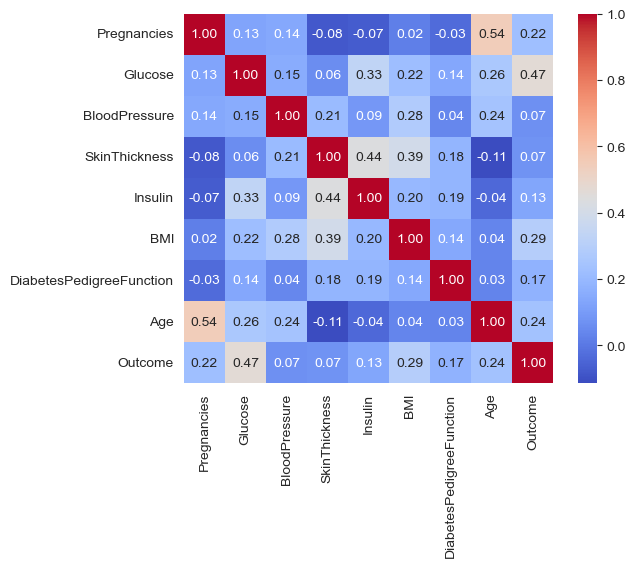

In [11]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 10}, cmap = 'coolwarm')

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
X = df[["Pregnancies", "BloodPressure", "SkinThickness", "BMI", "Age", "DiabetesPedigreeFunction"]] #Seleccionamos las variables predictoras
y = df.Glucose #Defino el Target

In [14]:
#Separo en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [16]:
#Fiteo el modelo
linear_model.fit(X_train,y_train)

LinearRegression()

In [17]:
#Evaluamos el modelo
from sklearn.metrics import mean_squared_error
modelo = ['Regresion lineal']

for i, model in enumerate ([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict (X_test)

    print(f'Modelo benchmark: {modelo[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raiz del error cuadratico medio en train: {rmse_train}')
    print(f'Raiz del error cuadratico medio en test: {rmse_test}')

Modelo benchmark: Regresion lineal
Raiz del error cuadratico medio en train: 30.041716412863092
Raiz del error cuadratico medio en test: 29.623205597305788


In [18]:
#Ahora vamos a entrenar un modelo de árbol de decisión y de vecinos cercanos
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [19]:
#Creamos los modelos
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [20]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [21]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [22]:
#Realizamos la prediccion y calculamos el RMSE de los modelos generados
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 29.087867323605632
Raíz del error cuadrático medio en Test: 31.360966341214564
Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 26.18407692747181
Raíz del error cuadrático medio en Test: 31.209833060330194


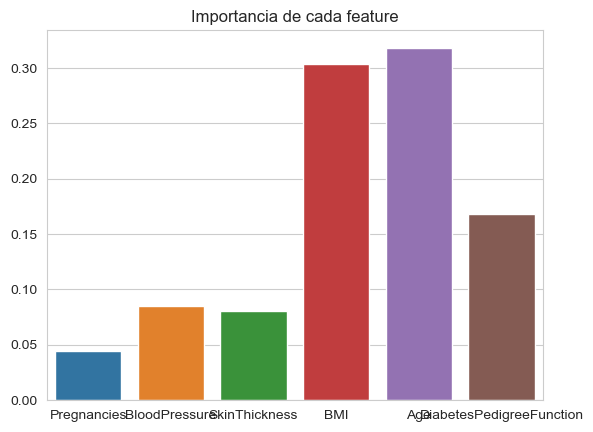

In [23]:
import seaborn as sns

importances = tree_regressor.feature_importances_
columns= X.columns
data = {'Feature': columns, 'Importance': importances}
sns.barplot(x='Feature', y='Importance', data=data)
plt.title('Importancia de cada feature')
plt.show()

In [24]:
X = df[["Pregnancies", "BloodPressure", "BMI", "Age", "DiabetesPedigreeFunction","Glucose"]] #Seleccionamos las variables predictoras
y = df.Outcome #Defino el Target

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=50)


In [27]:
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [28]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento: ', train_accuracy)
print('% de aciertos sobre el set de evaluacion: ', test_accuracy)

% de aciertos sobre el set de entrenamiento:  1.0
% de aciertos sobre el set de evaluacion:  0.7532467532467533


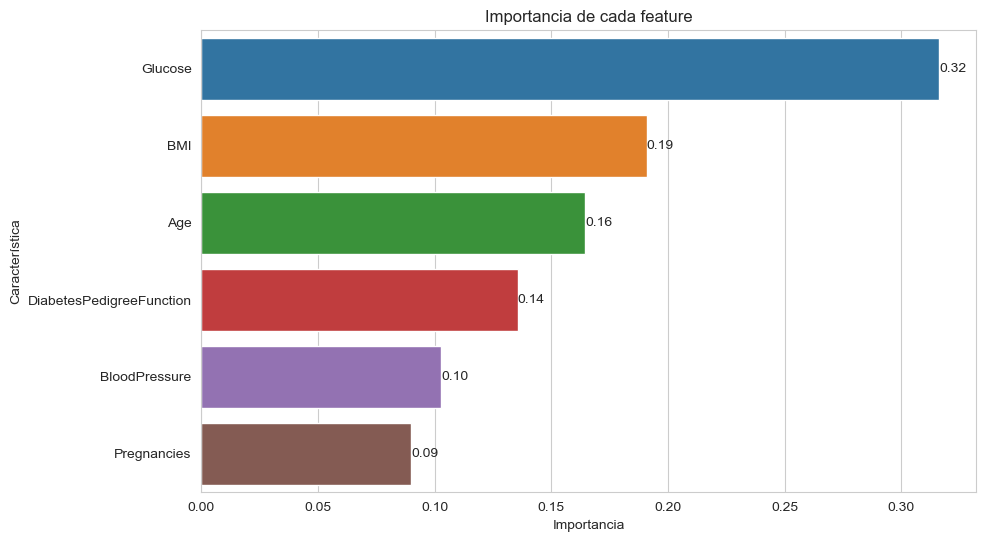

In [30]:
import numpy as np

importances = forest.feature_importances_
columns = X.columns
importance_df = pd.DataFrame({'Feature': columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10)
plt.title('Importancia de cada feature')
plt.xlabel('Importancia')
plt.ylabel('Característica')

# Mostrar la gráfica
plt.show()

In [31]:
# Datos para probar manualmente
datos_prueba = [
    [2, 70, 40, 50, 0.6, 126],
    [2, 70, 40, 20, 0.6, 126],
    [0, 100, 29, 35, 0.4, 140]
]

# Convertir la lista de datos a un array
datos_prueba_array = np.array(datos_prueba)

# Realizar la predicción para los datos de prueba
predicciones = forest.predict(datos_prueba_array)

# Diccionario para mapear predicciones numéricas a etiquetas legibles
mapeo_etiquetas = {0: "Diabetes negativo", 1: "Diabetes positivo"}

# Imprimir las predicciones
for i, prediccion in enumerate(predicciones):
    etiqueta_prediccion = mapeo_etiquetas[prediccion]
    print(f"Predicción {i + 1}: {etiqueta_prediccion}")


Predicción 1: Diabetes positivo
Predicción 2: Diabetes negativo
Predicción 3: Diabetes positivo


H:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
